In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
m = pd.read_csv("../../data/processed/KOBIS_개봉일람_2.csv")

m

,영화명,감독,제작사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,장편,한국,1587,1.357484e+11,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)어바웃잇영화사 해그림 주식회사(주)씨제이이엔엠,2019-01-23,장편,한국,1978,1.396480e+11,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,리얼라이즈픽쳐스(주)(주)덱스터스튜디오,2017-12-20,장편,한국,1912,1.156987e+11,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화
3,국제시장,윤제균,(주)제이케이필름(주)씨제이이엔엠,2014-12-17,장편,한국,966,1.108280e+11,14245998,2.584252e+10,3233946,드라마,12세이상관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소조 루소,마블 스튜디오,2019-04-24,장편,미국,2835,1.221827e+11,13934592,3.357714e+10,3597963,액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,늑대와 빨간 재킷,뱅상 파로노,NaN,2021-02-03,장편,프랑스,74,8.525200e+06,950,2.893740e+06,345,스릴러,청소년관람불가,독립/예술영화
3971,마라가 큰 결정을 해야 해,로버트 루케틱,NaN,2021-01-07,장편,미국,79,7.475940e+06,856,2.830800e+06,321,멜로/로맨스,15세이상관람가,일반영화
3972,락다운 213주,아담 메이슨,플래티넘 듄스,2022-08-31,장편,미국,61,7.664799e+06,845,3.573900e+06,381,스릴러,15세이상관람가,일반영화
3973,래미의 드래곤월드 구출작전,웨이밍 황,NaN,2020-07-16,장편,중국,65,6.067340e+06,779,6.345000e+05,74,애니메이션,전체관람가,일반영화


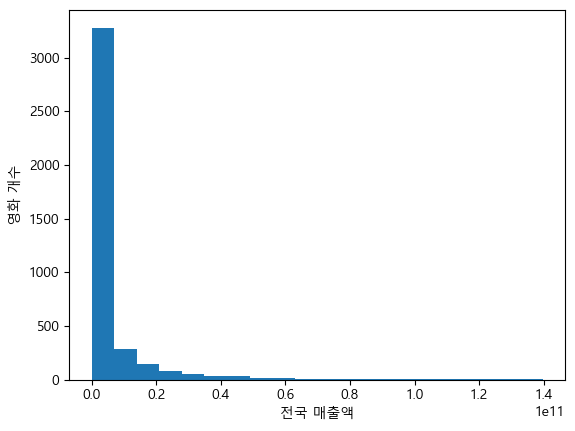

In [5]:
# 전국 매출액 히스토그램
plt.hist(m["전국 매출액"], bins=20)
plt.xlabel("전국 매출액")
plt.ylabel("영화 개수")
plt.show()

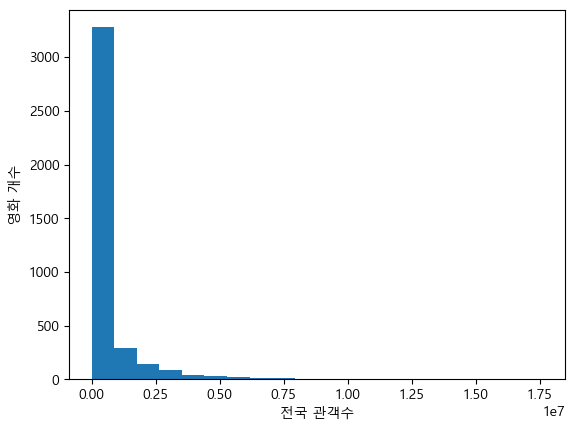

In [7]:
# 전국 관객수 히스토그램
plt.hist(m["전국 관객수"], bins=20)
plt.xlabel("전국 관객수")
plt.ylabel("영화 개수")
plt.show()

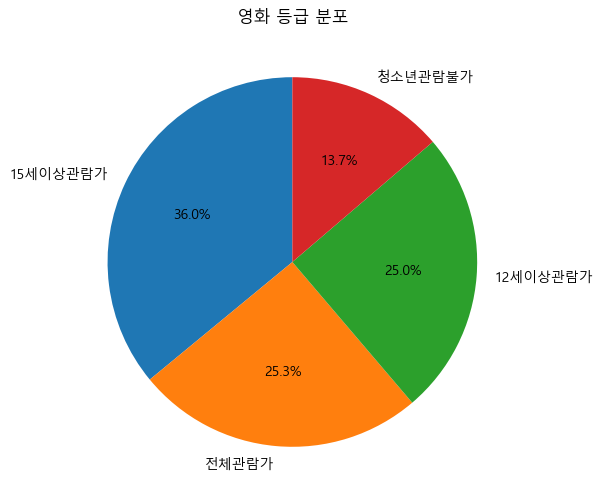

In [9]:
plt.figure(figsize=(6,6))
plt.pie(m["등급"].value_counts(), labels=m["등급"].value_counts().index, autopct="%1.1f%%", startangle=90)
plt.title("영화 등급 분포")
plt.show()

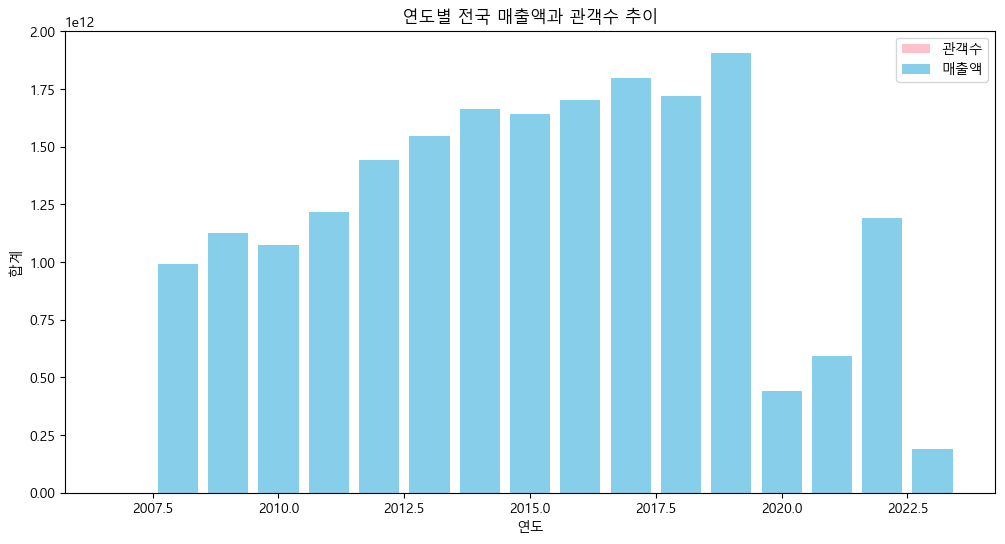

In [14]:
year_sum = m.groupby(pd.to_datetime(m['개봉일']).dt.year).sum()
plt.figure(figsize=(12,6))
plt.bar(year_sum.index, year_sum["전국 매출액"], color="skyblue", label="매출액")
plt.xlabel("연도")
plt.ylabel("합계")
plt.legend()
plt.title("연도별 전국 매출액추이")
plt.show()

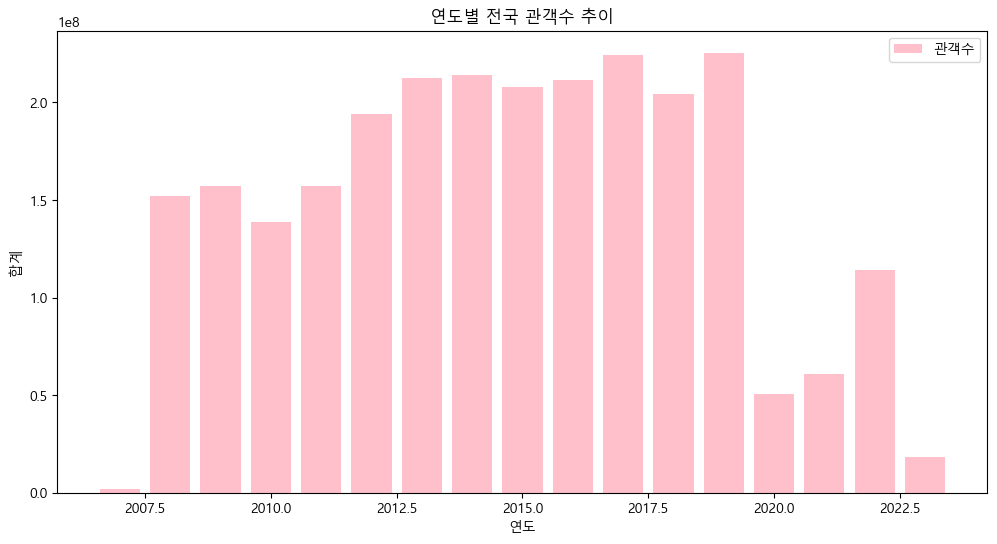

In [15]:
plt.figure(figsize=(12,6))
plt.bar(year_sum.index, year_sum["전국 관객수"], color="pink", label="관객수")
plt.xlabel("연도")
plt.ylabel("합계")
plt.legend()
plt.title("연도별 전국 관객수 추이")
plt.show()

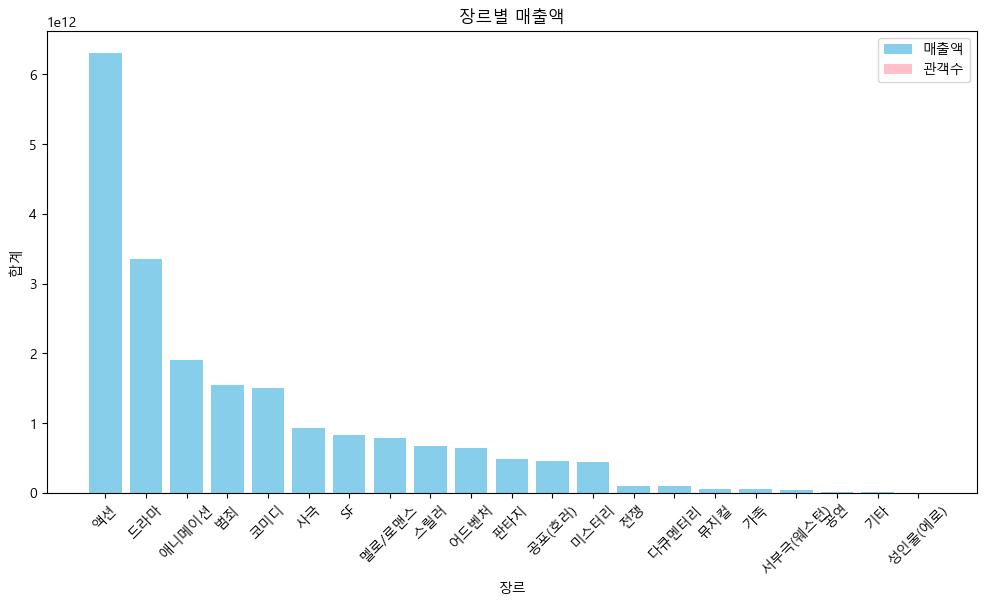

In [16]:
genre_sum = m.groupby('장르').sum().sort_values(by='전국 매출액', ascending=False)
plt.figure(figsize=(12,6))
plt.bar(genre_sum.index, genre_sum['전국 매출액'], color='skyblue', label='매출액')
plt.bar(genre_sum.index, genre_sum['전국 관객수'], color='pink', label='관객수')
plt.xlabel('장르')
plt.ylabel('합계')
plt.legend()
plt.title('장르별 매출액')
plt.xticks(rotation=45)
plt.show()

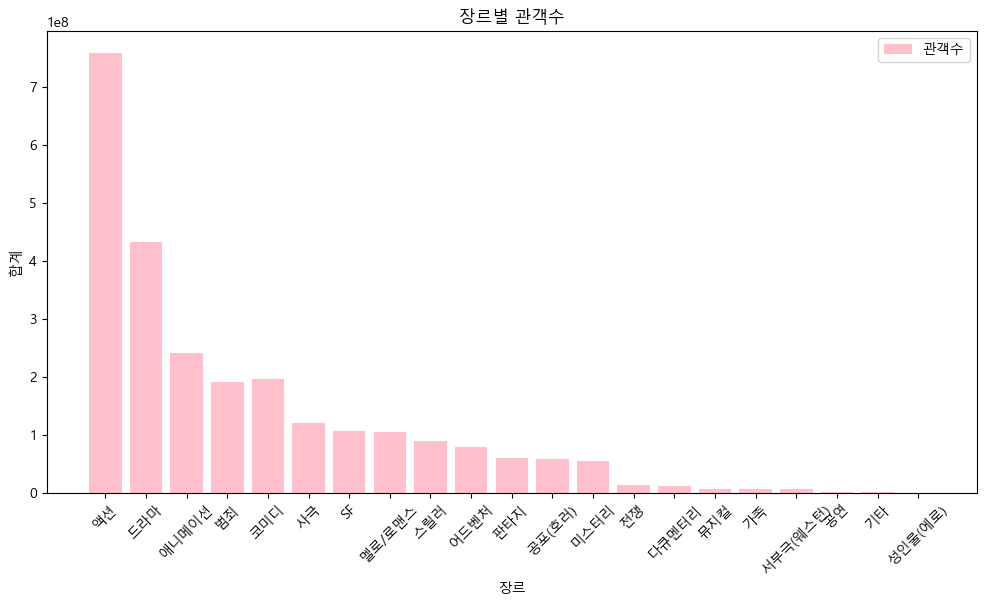

In [17]:
plt.figure(figsize=(12,6))
plt.bar(genre_sum.index, genre_sum['전국 관객수'], color='pink', label='관객수')
plt.xlabel('장르')
plt.ylabel('합계')
plt.legend()
plt.title('장르별 관객수')
plt.xticks(rotation=45)
plt.show()

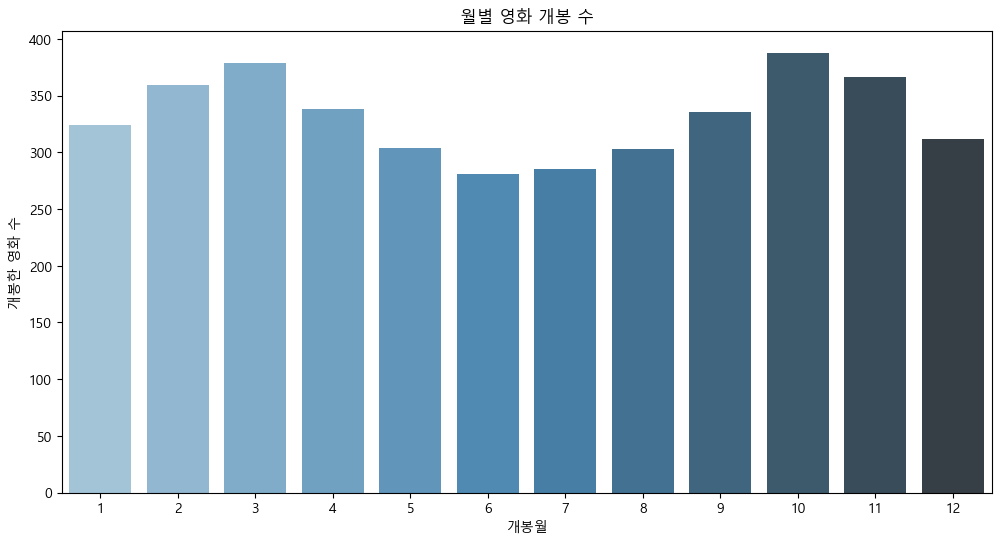

In [38]:
# 개봉 연도를 나타내는 '개봉일' 열에서 연도만 추출합니다.
m['month'] = pd.to_datetime(m['개봉일']).dt.month

# 연도별 개봉한 영화 수를 구합니다.
month_count = m['month'].value_counts().sort_index()

# 시각화합니다.
plt.figure(figsize=(12,6))
sns.barplot(x=month_count.index, y=month_count.values, palette="Blues_d")
plt.title("월별 영화 개봉 수")
plt.xlabel("개봉월")
plt.ylabel("개봉한 영화 수")
plt.show()

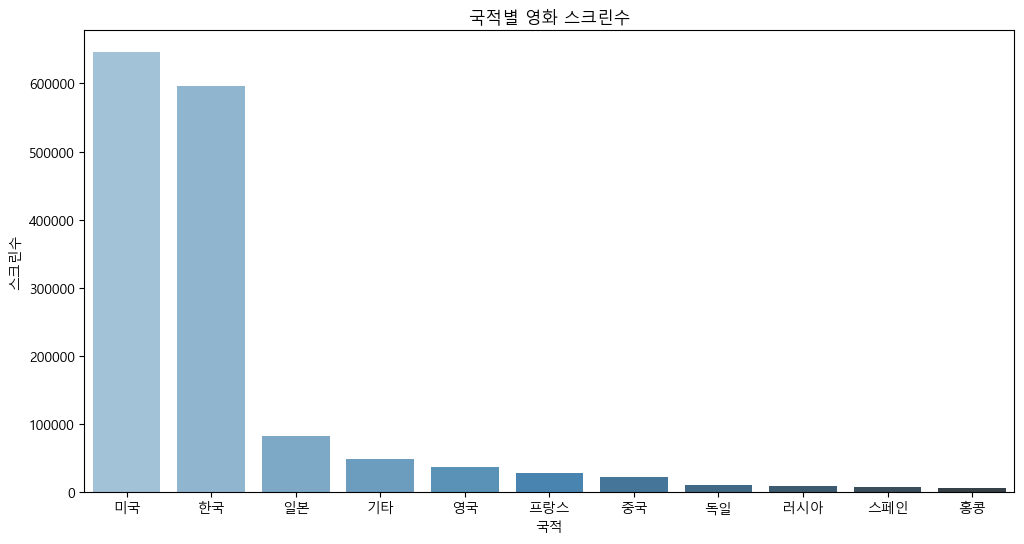

In [9]:
# 국적별 영화 스크린수을 구합니다.
nation_boxoffice = m.groupby('국적')['전국 스크린수'].sum().sort_values(ascending=False)

# 시각화합니다.
plt.figure(figsize=(12,6))
sns.barplot(x=nation_boxoffice.index, y=nation_boxoffice.values, palette="Blues_d")
plt.title("국적별 영화 스크린수")
plt.xlabel("국적")
plt.ylabel("스크린수")
plt.show()

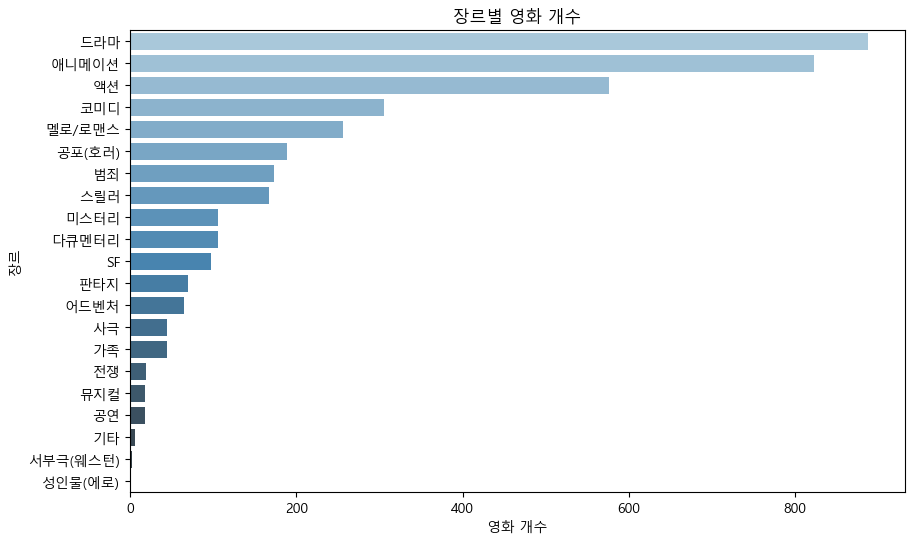

In [10]:
# 장르별 영화 개수를 구합니다.
genre_count = m['장르'].value_counts()

# 시각화합니다.
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette="Blues_d")
plt.title("장르별 영화 개수")
plt.xlabel("영화 개수")
plt.ylabel("장르")
plt.show()